In [187]:

# 1. install required packages
import numpy as np
import pandas as pd
import datetime as dtm
import folium
import matplotlib.pyplot as plt
import matplotlib.colors

from datetime import datetime
from sklearn import linear_model as lm
from sklearn.preprocessing import PolynomialFeatures

In [188]:
data_county = pd.read_csv("data/Violent_Crime___Property_Crime_by_County__1975_to_Present.csv", sep=',')
data_state = pd.read_csv("data/Violent_Crime___Property_Crime_Statewide_Totals__1975_to_Present.csv", sep=',')

rate_rename = ['Jurisdiction', 'Year', 'Overall', 'Violent', 
               'Property', 'Murder', 'Rape', 'Robbery', 
               'Agg_Assault', 'B_&_E', 'Larceny', 'MV_Theft']
rate_columns = ['JURISDICTION',
                'YEAR', 
                'OVERALL CRIME RATE PER 100,000 PEOPLE', 
                'VIOLENT CRIME RATE PER 100,000 PEOPLE',
                'PROPERTY CRIME RATE PER 100,000 PEOPLE',
                'MURDER PER 100,000 PEOPLE',
                'RAPE PER 100,000 PEOPLE',
                'ROBBERY PER 100,000 PEOPLE',
                'AGG. ASSAULT PER 100,000 PEOPLE',
                'B & E PER 100,000 PEOPLE',
                'LARCENY THEFT PER 100,000 PEOPLE',
                'M/V THEFT PER 100,000 PEOPLE']


In [189]:
rate_MD_df = data_state.filter(rate_columns, axis=1)
rate_MD_df.columns = rate_rename

rate_MD_df.head()


,Jurisdiction,Year,Overall,Violent,Property,Murder,Rape,Robbery,Agg_Assault,B_&_E,Larceny,MV_Theft
0,Maryland,1975,5910.4,709.6,5200.8,10.6,31.4,344.2,323.4,1413.8,3269.9,517.1
1,Maryland,1976,5663.8,633.4,5030.4,8.5,32.0,295.5,297.3,1359.8,3241.7,428.9
2,Maryland,1977,5699.5,693.8,5005.7,8.0,34.8,292.1,358.9,1399.8,3177.5,428.4
3,Maryland,1978,5813.2,732.0,5081.1,8.2,35.6,309.6,378.6,1421.7,3234.7,424.8
4,Maryland,1979,6297.1,798.2,5499.0,9.8,39.2,331.3,417.9,1510.2,3501.5,487.3


In [190]:
rate_County_df = data_county.filter(rate_columns, axis=1)
rate_County_df.columns = rate_rename

rate_County_df.head()

,Jurisdiction,Year,Overall,Violent,Property,Murder,Rape,Robbery,Agg_Assault,B_&_E,Larceny,MV_Theft
0,Allegany County,1975,2923.9,178.3,2745.6,3.8,6.3,25.1,143.1,839.9,1789.0,116.8
1,Allegany County,1976,2532.1,103.7,2428.4,2.4,2.4,28.6,70.3,692.3,1649.1,87.0
2,Allegany County,1977,2693.0,154.7,2538.3,3.7,8.5,39.0,103.5,721.1,1693.0,124.2
3,Allegany County,1978,2664.9,127.6,2537.3,1.3,2.5,22.5,101.3,674.0,1738.2,125.1
4,Allegany County,1979,2912.7,138.0,2774.7,1.3,8.8,22.6,105.4,629.7,2020.8,124.2


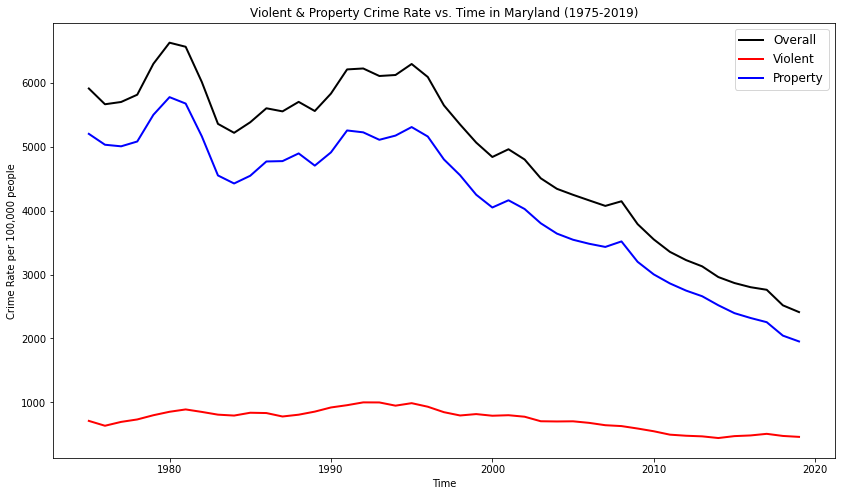

In [191]:
plt.figure(figsize=(14, 8))
plt.title('Violent & Property Crime Rate vs. Time in Maryland (1975-2019)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

plt.plot(rate_MD_df.Year, rate_MD_df.Overall, label='Overall', lw=2, c='black')
plt.plot(rate_MD_df.Year, rate_MD_df.Violent, label='Violent', lw=2, c='r')
plt.plot(rate_MD_df.Year, rate_MD_df.Property, label='Property', lw=2, c='b')

plt.legend(fontsize='large')
plt.show()

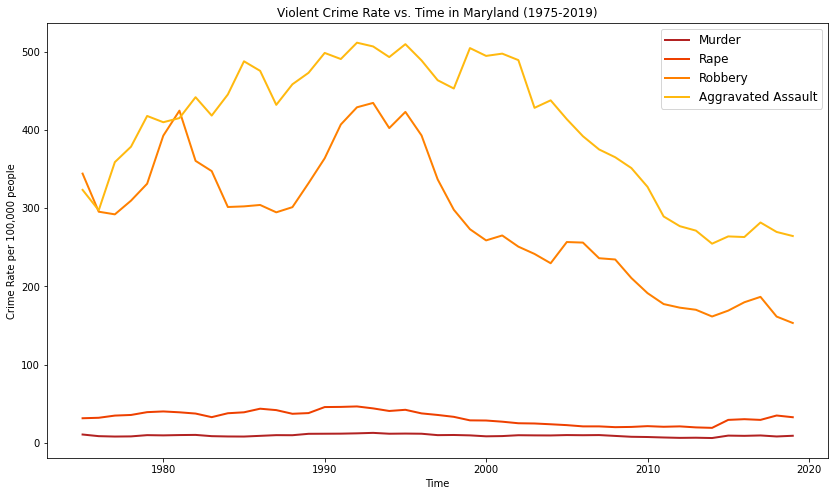

In [192]:
plt.figure(figsize=(14, 8))
plt.title('Violent Crime Rate vs. Time in Maryland (1975-2019)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

plt.plot(rate_MD_df.Year, rate_MD_df.Murder, label='Murder', lw=2, c='#B22222')
plt.plot(rate_MD_df.Year, rate_MD_df.Rape, label='Rape', lw=2, c='#EE4000')
plt.plot(rate_MD_df.Year, rate_MD_df.Robbery, label='Robbery', lw=2, c='#FF8000')
plt.plot(rate_MD_df.Year, rate_MD_df.Agg_Assault, label='Aggravated Assault', lw=2, c='#FFB90F')

plt.legend(fontsize='large')
plt.show()

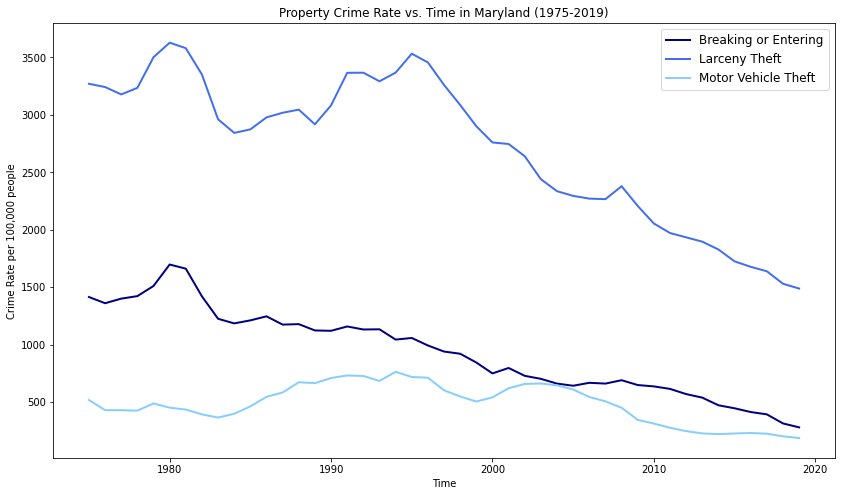

In [193]:
plt.figure(figsize=(14, 8))
plt.title('Property Crime Rate vs. Time in Maryland (1975-2019)')
plt.xlabel('Time')
plt.ylabel('Crime Rate per 100,000 people')

plt.plot(rate_MD_df.Year, rate_MD_df['B_&_E'], label='Breaking or Entering', lw=2, c='#000080')
plt.plot(rate_MD_df.Year, rate_MD_df.Larceny, label='Larceny Theft', lw=2, c='#436EEE')
plt.plot(rate_MD_df.Year, rate_MD_df.MV_Theft, label='Motor Vehicle Theft', lw=2, c='#87CEFF')

plt.legend(fontsize='large')
plt.show()

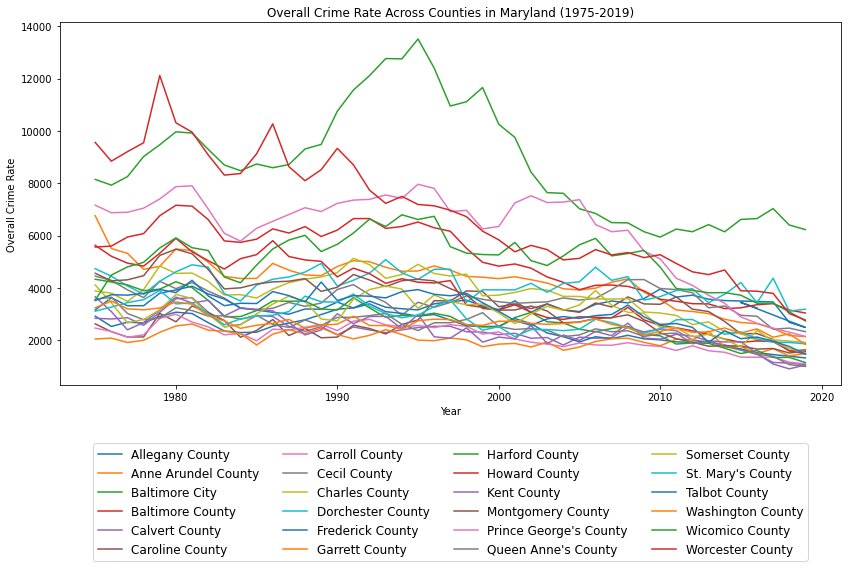

In [208]:
group_counties = rate_County_df.groupby(['Jurisdiction'])

fig = plt.figure(figsize=(14, 8))
for (name, cdf) in group_counties:
   cdfX, cdfY = cdf["Year"].values, cdf["Overall"].values
   plt.plot(cdfX, cdfY, label=name)
plt.xlabel('Year')
plt.ylabel('Overall Crime Rate')
plt.title('Overall Crime Rate Across Counties in Maryland (1975-2019)')
plt.legend(loc="lower center", bbox_to_anchor=(0.5, -0.5), ncol=4, fontsize='large')
fig.subplots_adjust(bottom=0.25)

plt.show()


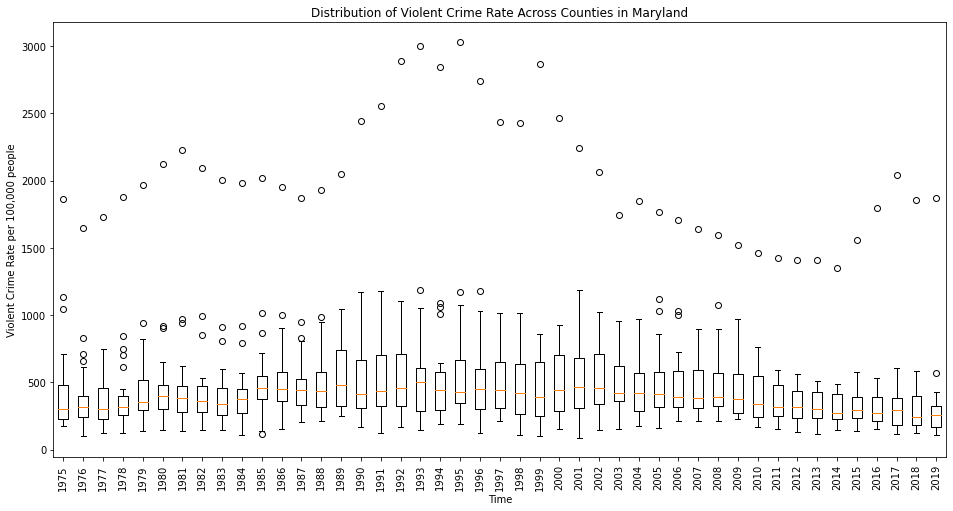

In [221]:
violent_dist = []
for yr in range(1975, 2020):
   arr1d = []
   for i in rate_County_df.index:
      if (rate_County_df['Year'].values[i] == yr):
         arr1d.append(rate_County_df['Violent'].values[i])
   violent_dist.append(arr1d)

plt.figure(figsize=(16, 8))
plt.title('Distribution of Violent Crime Rate Across Counties in Maryland')
plt.xlabel('Time')
plt.ylabel('Violent Crime Rate per 100,000 people')
plt.boxplot(violent_dist, labels=np.arange(1975, 2020, 1))
plt.xticks(rotation='vertical')
plt.show()

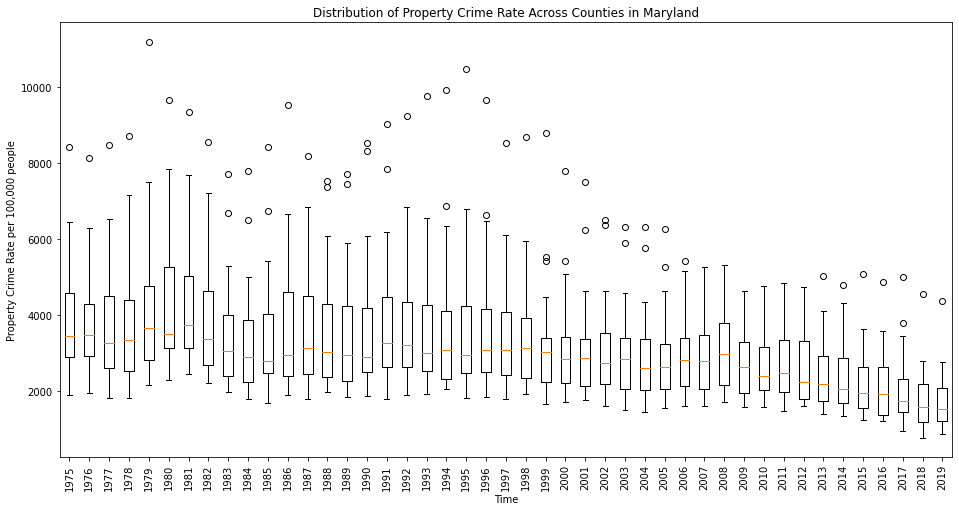

In [222]:
property_dist = []
for yr in range(1975, 2020):
   arr1d = []
   for i in rate_County_df.index:
      if (rate_County_df['Year'].values[i] == yr):
         arr1d.append(rate_County_df['Property'].values[i])
   property_dist.append(arr1d)

plt.figure(figsize=(16, 8))
plt.title('Distribution of Property Crime Rate Across Counties in Maryland')
plt.xlabel('Time')
plt.ylabel('Property Crime Rate per 100,000 people')
plt.boxplot(property_dist, labels=np.arange(1975, 2020, 1))
plt.xticks(rotation='vertical')
plt.show()